# Objectives

* Use Diwali sales data analysis to solve questions related to **consumer purchasing behavior** and **trends during the festive season**.
* Analyze total orders by geographic zone to **identify regions with the highest sales** and optimize marketing strategies accordingly.
* Examine sales by product category to determine which **products are most popular during Diwali**, informing **inventory management and promotional efforts**.
* Utilize **data visualization techniques** to effectively communicate findings and insights from the sales data.

# Setting Data Path

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Diwali-Sales-Data.csv'

# Importing Libraries

* **pandas :** for managing the data.
* **numpy  :** for mathematical operations.
* **matplotlib :** for additional plotting tools.
* **seaborn :** for visualizing the data.
* **sklearn :** for machine learning and machine-learning-pipeline related functions.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Diwali sales data

In [4]:
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [ ]:
# Basic structure of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
None


In [ ]:
# Basic statistical Insights
print(df.describe())

            User_ID           Age  Marital_Status        Orders        Amount  \
count  1.125100e+04  11251.000000    11251.000000  11251.000000  11239.000000   
mean   1.003004e+06     35.421207        0.420318      2.489290   9453.610858   
std    1.716125e+03     12.754122        0.493632      1.115047   5222.355869   
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000   
25%    1.001492e+06     27.000000        0.000000      1.500000   5443.000000   
50%    1.003065e+06     33.000000        0.000000      2.000000   8109.000000   
75%    1.004430e+06     43.000000        1.000000      3.000000  12675.000000   
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000   

       Status  unnamed1  
count     0.0       0.0  
mean      NaN       NaN  
std       NaN       NaN  
min       NaN       NaN  
25%       NaN       NaN  
50%       NaN       NaN  
75%       NaN       NaN  
max       NaN       NaN  


**Basic Insight**


attribute for segemnting data we get : age &b spending

In [ ]:
# calculate number of unique customers
print(df["User_ID"].nunique())

3755


In [ ]:
# Distinct State
df["State"].unique()


array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Madhya Pradesh',
       'Jharkhand', 'Kerala', 'Haryana', 'Bihar', 'Rajasthan',
       'Uttarakhand', 'Telangana', 'Punjab'], dtype=object)

In [ ]:
# count total distinct states
df["State"].nunique()

16

In [ ]:
# calculate total number of missing values in each column
df.isna().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
# Drop Status & unnamed1 column as all values are null
df.drop(['Status','unnamed1'], inplace=True,axis=1)
df.head()

In [ ]:
# Drop all missing value from dataset
df.dropna(inplace=True)

# State count vizualization

vizualize which staet  have highest orders and customer engagement using bar chart

<Axes: xlabel='State'>

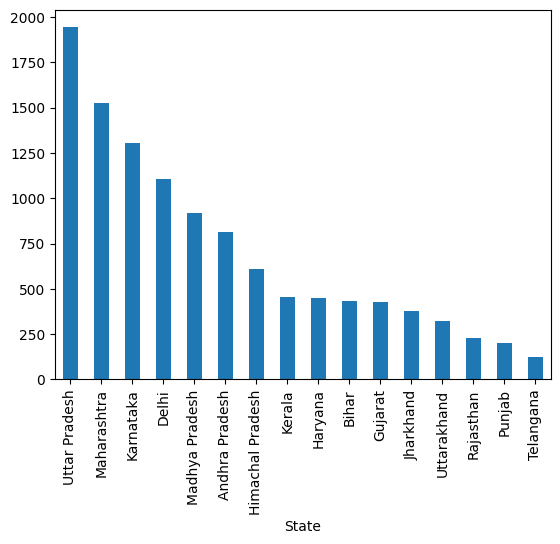

In [ ]:
state_count = df['State'].value_counts()
state_count.plot(kind='bar')

# Insight from State_count vizualization



1.   UP > Maharashtra > Karnataka = top 3 highest leads , means strong market prescence
2.   Delhi , MP , Andhra Pradesh moderate growth , means scope or opportunities.
3. Telangana & Punjab least customer engagement , means require targeted marketing efforts.

 This vizualization guides resource allocation and marketing strategies.



# Total Sales per State

Understand total sales distribution across different geographical locations.

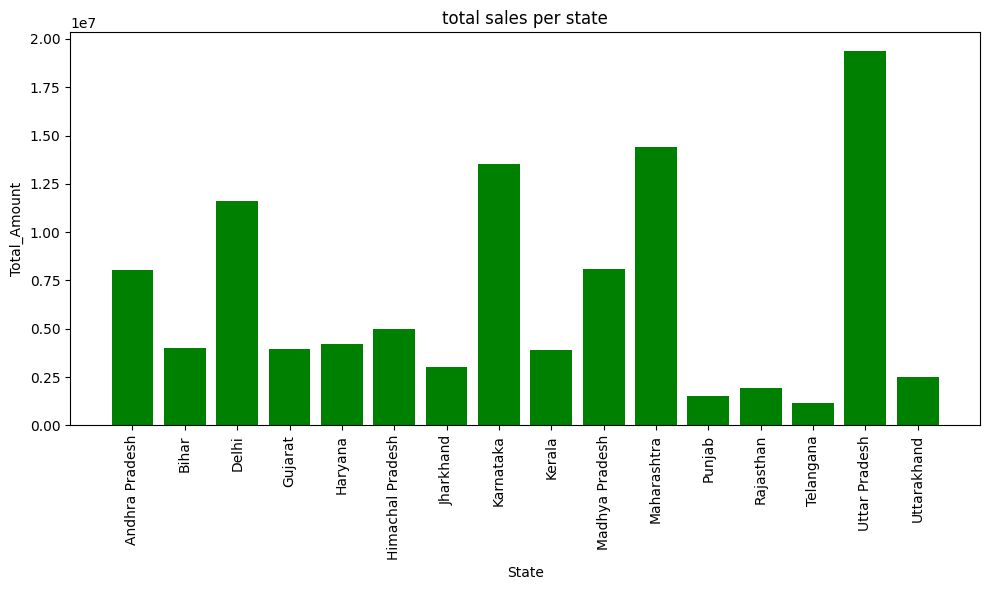

In [ ]:
total_sales_per_state = df.groupby('State')['Amount'].sum().reset_index()
total_sales_per_state.columns = ['State','Total_Amount']

# Bar chart for total sales by state
plt.figure(figsize=(10,6))
plt.bar(total_sales_per_state["State"],total_sales_per_state["Total_Amount"],color  = 'green')
plt.title("total sales per state")
plt.xlabel("State")
plt.ylabel("Total_Amount")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Insights from Total_Sales_per_Order

* Highest sales State = Up>Maharastra >  means high engagement states

* Lowest sales state = Telangana , Punjab , means they are potential areas for growth or increased marketing efforts
* Moderate sales  = Karnataka & Delhi  means key contributor to overall sales

This information Valuable to identify strong Markets and which require more attention and strategy adjustments.

# Average order value per state

 * This metric helps to assess customer spending behavior and can indicate how much, on average, customers are willing to spend per order in different regions.

 * Understanding average order value across states can inform pricing strategies, promotional efforts, and resource allocation.


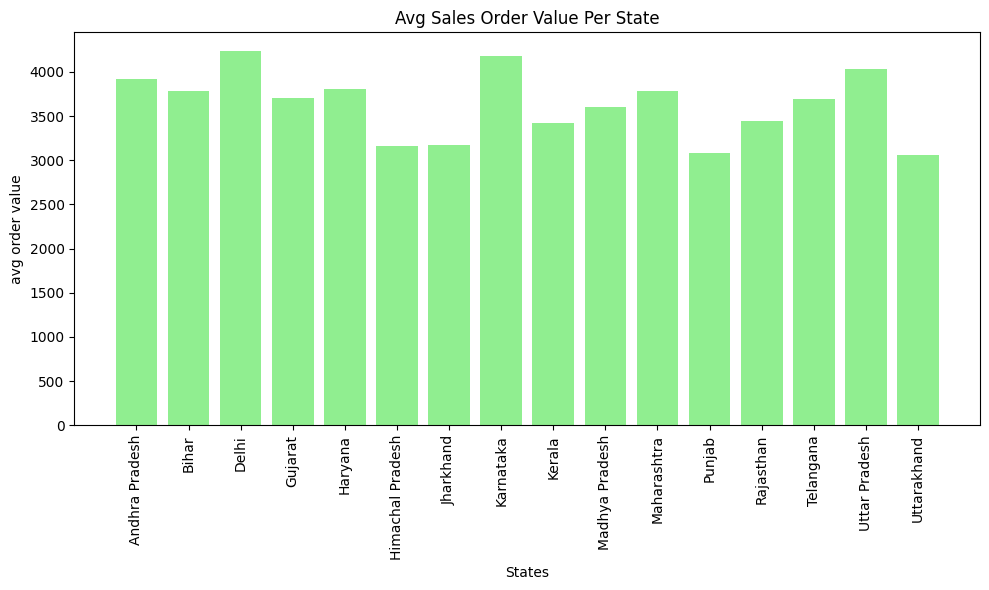

In [ ]:
avg_order_value = df.groupby("State").agg({'Amount':'sum','Orders':'sum'}).reset_index()
avg_order_value['avg_order_value']= avg_order_value['Amount']/avg_order_value['Orders']
avg_order_value = avg_order_value[['State',"avg_order_value"]]
avg_order_value

# Bar chart for average order value by state
plt.figure(figsize=(10,6))
plt.bar(avg_order_value['State'],avg_order_value['avg_order_value'],color = 'lightgreen')
plt.title("Avg Sales Order Value Per State")
plt.xlabel('States')
plt.ylabel('avg order value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Insights on average order value per state

1. **Highest Average Order Value:** Delhi has the highest average order value at approximately ₹4,235, indicating that customers in this state tend to spend more per order compared to other regions. This may suggest a higher purchasing power or a preference for premium products.

2. **Lowest Average Order Value:** Uttarakhand has the lowest average order value at around ₹3,059. This could indicate budget-conscious spending habits among consumers in this state or a lower average price point for products sold.

3. **Mid-range Values:** States like Andhra Pradesh and Karnataka show average order values close to ₹3,919 and ₹4,174, respectively. This suggests that these regions have a healthy level of consumer spending, which can be leveraged for targeted marketing strategies.

4. **Consistency Across States:** Most states have average order values ranging from ₹3,000 to ₹4,300, indicating a relatively consistent spending behavior among consumers across different regions, with minor fluctuations based on local market conditions.

5. **Opportunity for Growth:** The average order values in states like Himachal Pradesh and Jharkhand are lower (around ₹3,165 and ₹3,176). This presents an opportunity for businesses to explore strategies to increase the average transaction size, such as promotions or bundling offers.

# Orders By Gender

Identiy distribution of purchasing activity across different gender demographics

<function matplotlib.pyplot.show(close=None, block=None)>

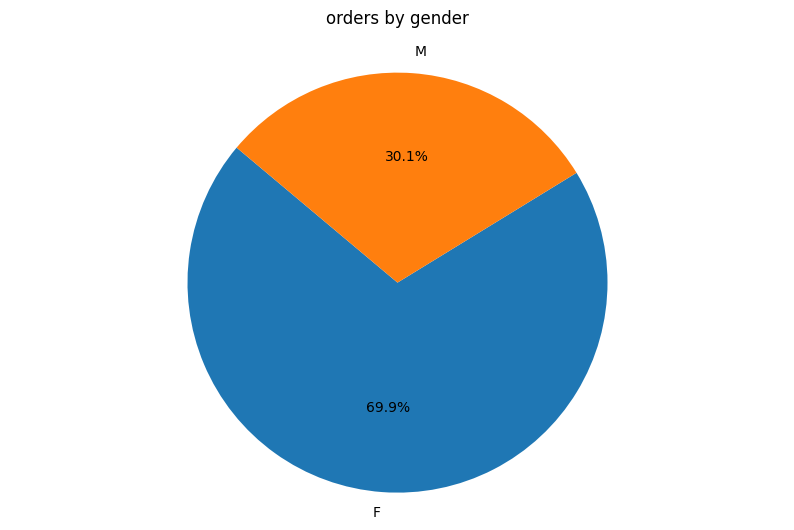

In [ ]:
orders_by_gender = df.groupby('Gender')['Orders'].sum().reset_index()

# pie chart for orders by gender
plt.figure(figsize=(10,6))
plt.pie(orders_by_gender['Orders'],labels=orders_by_gender['Gender'], autopct='%1.1f%%', startangle= 140)
plt.title('orders by gender', pad=20)
plt.axis('equal')
plt.show

# Key insights
The data reveals that female customers (F) made significantly more orders (19,548) than male customers (M) with 8,433 orders. This indicates stronger purchasing engagement from females, suggesting that marketing strategies could be tailored to better target this demographic.

# Orders by age group
 To understand customer engagement across various demographics. This helps identify which age segments contribute most to total orders, informing targeted marketing strategies.

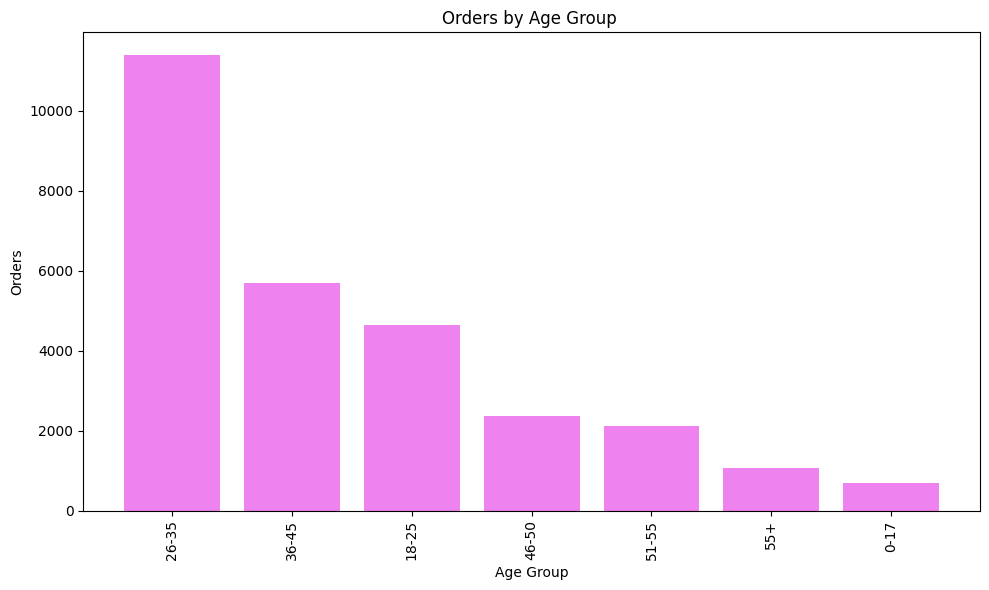

In [ ]:
# orders by age group
orders_by_age = df.groupby('Age Group')['Orders'].sum().reset_index().sort_values(by='Orders',ascending=False)

# Bar chart for orders by age group
plt.figure(figsize=(10,6))
plt.bar(orders_by_age['Age Group'], orders_by_age['Orders'], color='violet' )
plt.title("Orders by Age Group ")
plt.xlabel('Age Group')
plt.ylabel('Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Insights from orders by age group


1. The 26-35 age group is the largest contributor to orders, indicating strong purchasing power and engagement.
2. Young adults (18-25) also show notable activity, suggesting opportunities for trend-driven marketing.
3. Orders from middle-aged groups (36-45) reflect a steady market presence, while older segments (46+) exhibit lower engagement, highlighting potential areas for targeted marketing efforts.
4. Overall, focusing on the younger and middle-aged demographics could enhance sales and customer retention strategies.

# Analysis of top-selling products
In this analysis, we are identifying the best-selling products based on the total number of orders.

By aggregating the order counts for each product, we can pinpoint which items are driving sales and customer engagement.

This insight helps in inventory management, marketing strategies, and product promotions.

## Insights from top-selling products
1. The top-selling products highlight significant customer preferences and trends, which can inform future inventory and marketing decisions.


2. Understanding which products lead in sales can help in optimizing stock levels and identifying potential areas for product promotions.


3. If certain products consistently rank high in orders, consider expanding related product lines or creating bundled offers to further enhance sales.

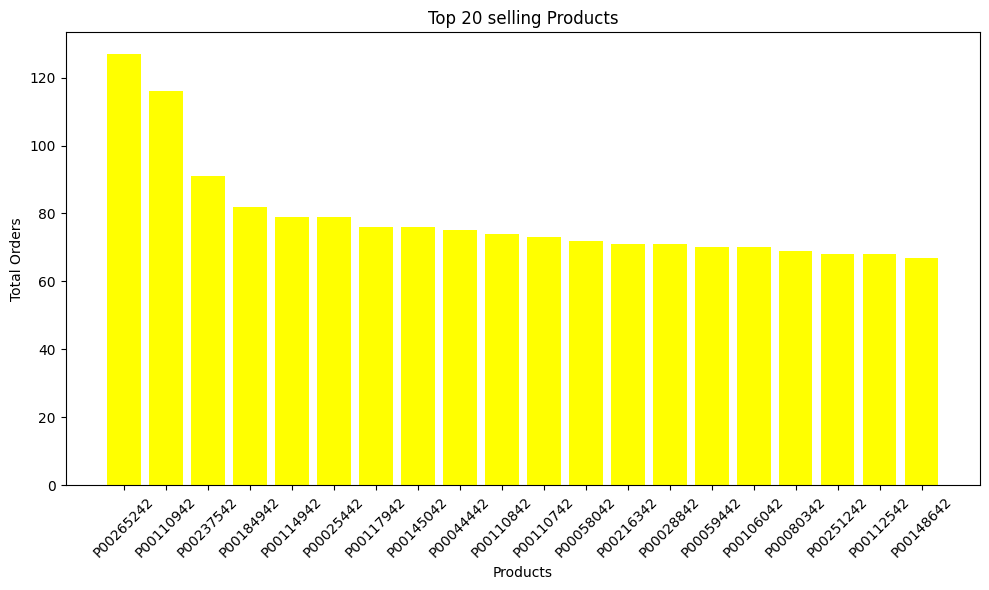

In [ ]:
# Top selling Products
top_selling_product = df.groupby('Product_ID')['Orders'].sum().reset_index()
top_selling_product.columns = ['Product','Total_Orders']
top_selling_product = top_selling_product.sort_values(by="Total_Orders", ascending=False)

# Top 20 Peoducts
top_20_Prodcts = top_selling_product.head(20)
top_20_Prodcts

# bar chart for top selling products
plt.figure(figsize=(10,6))
plt.bar(top_20_Prodcts['Product'], top_20_Prodcts['Total_Orders'], color='yellow')
plt.title('Top 20 selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights from top-selling products output
1. Top Product Performance: The product with ID P00265242 leads with 127 orders, indicating strong demand and potentially effective marketing or popularity among customers.

2. Consistent Demand: Several products, such as P00110942 and P00237542, have also shown significant order volumes (116 and 91 orders, respectively), suggesting that they are well-received by customers.

3. Order Volume Distribution: The top 20 products have order totals ranging from 67 to 127, highlighting a competitive landscape where even the lowest-selling products in this group are still generating substantial interest.

Strategic Focus: Identifying these top products can guide strategic decisions such as increasing stock levels, enhancing visibility through targeted marketing, or exploring potential collaborations with suppliers.

# Sales by product category analysis
We are aggregating sales data by product category to understand which categories generate the most orders and revenue.

This analysis provides insights into consumer preferences and helps identify categories that may require more marketing focus or inventory adjustments.

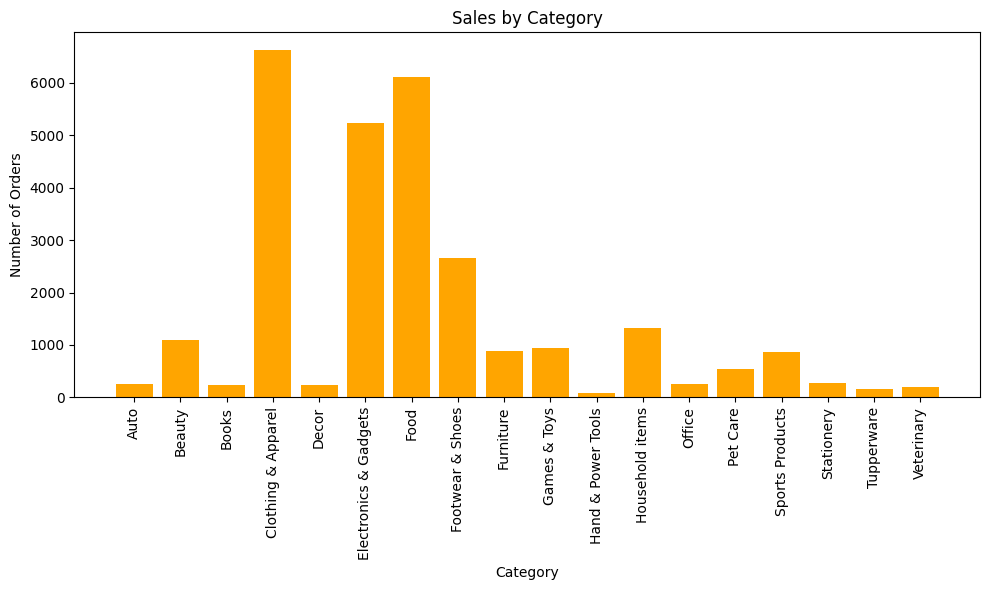

In [ ]:
# Sales by poduct category(
sales_by_category = df.groupby('Product_Category').agg({'Orders': 'sum','Amount':'sum'}).reset_index()

# bar chart for sales by category
plt.figure(figsize=(10,6))
plt.bar(sales_by_category['Product_Category'], sales_by_category['Orders'], color = 'orange')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Insights from sales by product category output
1. Food leads in both orders (6,110) and revenue ($33.9M), showing strong consumer demand.

2. Electronics & Gadgets (5,226 orders, $15.6M) and Clothing & Apparel (6,634 orders, $16.5M) also perform well, indicating popular consumer interests.

3. Footwear & Shoes generates substantial sales ($15.6M) with 2,646 orders.

4. Beauty (1,086 orders, $1.96M)& Sports Products (870 orders, $3.6M) show potential for growth.

4. Categories like Auto (239 orders, $1.96M) and Hand & Power Tools (80 orders, $405K) are underperforming and may need targeted marketing.

# Total orders by occupation

We are analyzing the distribution of total orders across different occupations to understand consumer behavior and preferences.

This information can help tailor marketing strategies to target specific occupational groups effectively.

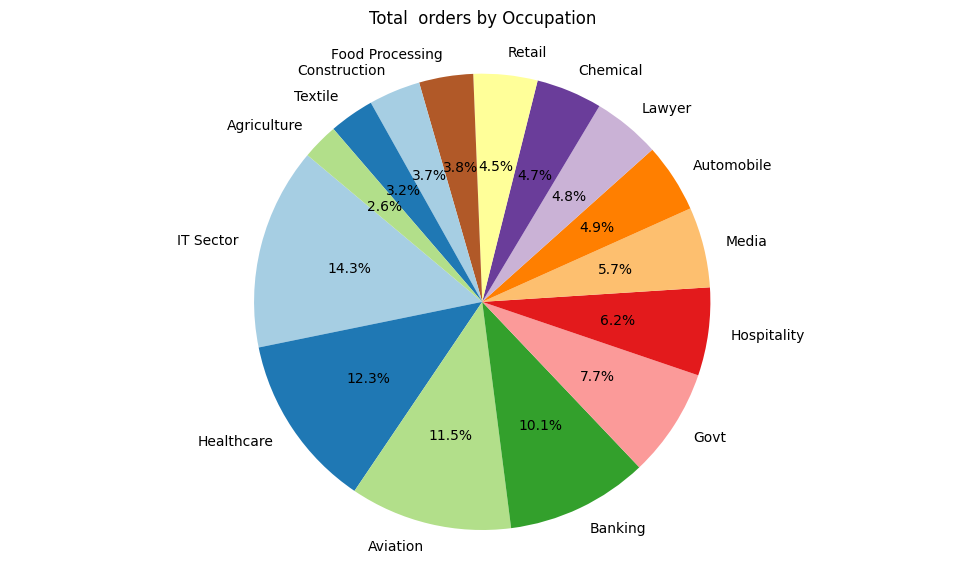

In [ ]:
occupation_order = df.groupby('Occupation')['Orders'].sum().reset_index()
occupation_order.columns = ['Occupation','Total_Orders']

#sort values by orders
occupation_order = occupation_order.sort_values(by='Total_Orders',ascending=False)

# pie chart for orders by occupation
plt.figure (figsize=(10,6))
plt.pie (occupation_order['Total_Orders'],
        labels=occupation_order['Occupation'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors
)
plt.title('Total  orders by Occupation', pad=20)
plt.axis('equal')
plt.tight_layout(pad=2)

plt.show()

The analysis of total orders by occupation reveals the following insights:

* IT Sector leads with the highest number of orders (3,997), indicating a strong consumer engagement in technology-related products or services.

* Healthcare and Aviation follow closely, with orders of 3,455 and 3,215, respectively, highlighting significant demand in these critical sectors.
* Other notable occupations include Banking (2,817), Government (2,155), and Hospitality (1,739), each demonstrating considerable order volumes.
*
Occupations such as Retail (1,270) and Construction (1,025) also contribute to the overall order count, suggesting diverse consumer interests across various fields.

# Order distribution

In this analysis, we visualize the distribution of the number of orders placed using a histogram combined with a kernel density estimate (KDE).

This helps us understand customer purchasing behavior, particularly the frequency of different order sizes.

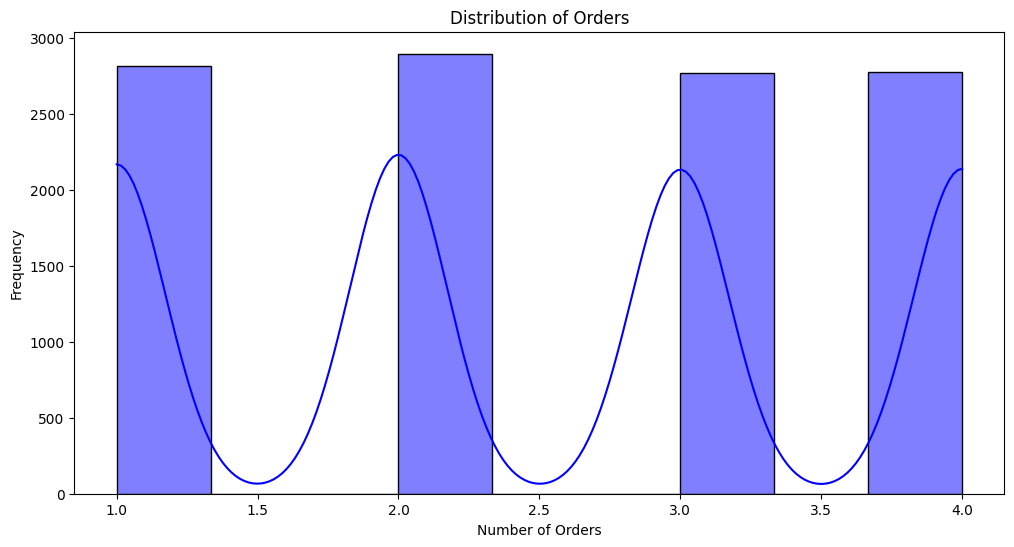

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['Orders'], kde=True, color='blue')
plt.title('Distribution of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()


Insights from order count data


* Popular Order Size: The most common order size consists of 2 orders, accounting for 2,893 instances. This suggests that many customers prefer ordering multiple items in a single transaction.

* Balanced Distribution: The counts for orders of 1 (2,808), 3 (2,765), and 4 (2,773) indicate a relatively balanced distribution of order sizes, reflecting diverse customer preferences.
* Focus on Order Optimization: Given that most orders fall between 1 to 4 items, strategies to encourage larger order sizes, such as bundle offers or discounts on higher quantities, could effectively increase sales.

# Amount distribution

We are visualizing the distribution of transaction amounts in our dataset to understand the spending behavior of customers.

This histogram will help identify common spending ranges and any potential outliers that may exist in the data.

The addition of a Kernel Density Estimate (KDE) curve provides a smoother representation of the distribution, allowing for better insights into the data's underlying patterns.

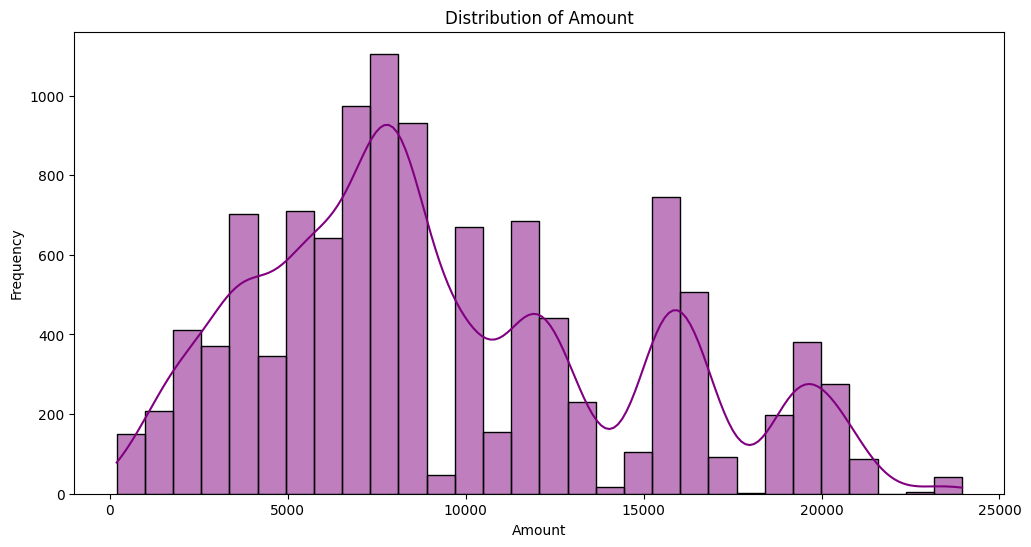

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['Amount'], bins= 30, kde=True, color= 'purple')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()



# Correlation heatmap

We are generating a correlation heatmap to visualize the relationships between various numeric columns in our dataset, including Age, Marital Status, Orders, and Amount.

This heatmap will help us identify potential correlations, such as how age or marital status may influence order volume and spending amounts. Understanding these relationships can guide our analysis and inform marketing strategies.

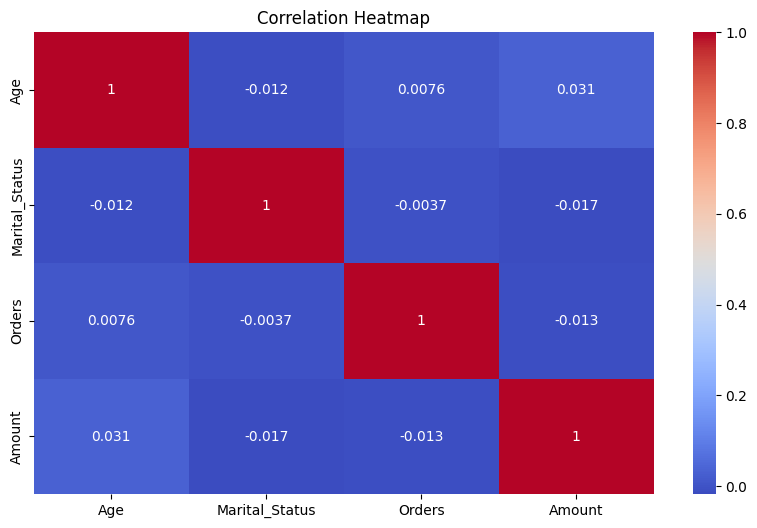

In [ ]:
numeric_columns = ['Age','Marital_Status','Orders','Amount']
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Key insights


* The correlation heatmap indicates weak relationships among Age, Marital Status, Orders, and Amount, with all coefficients near zero.

* Age shows a slight positive correlation (0.031) with Amount, suggesting older customers may spend marginally more.

* Overall, these variables do not significantly influence each other, indicating that other factors may drive sales and order frequency.



# Total count of each gender based on marital status

This bar chart visualizes the distribution of orders based on marital status and gender.

It shows that **Married** individuals place more orders than those who are **Not Married**, with **Females** particularly leading in the **Married** category.

This insight can inform targeted marketing strategies to engage these demographics effectively, especially during festive occasions.


  Marital_Status  Gender  counts
0    Not_Married  Female    4576
2        Married  Female    3266
1    Not_Married    Male    1946
3        Married    Male    1463


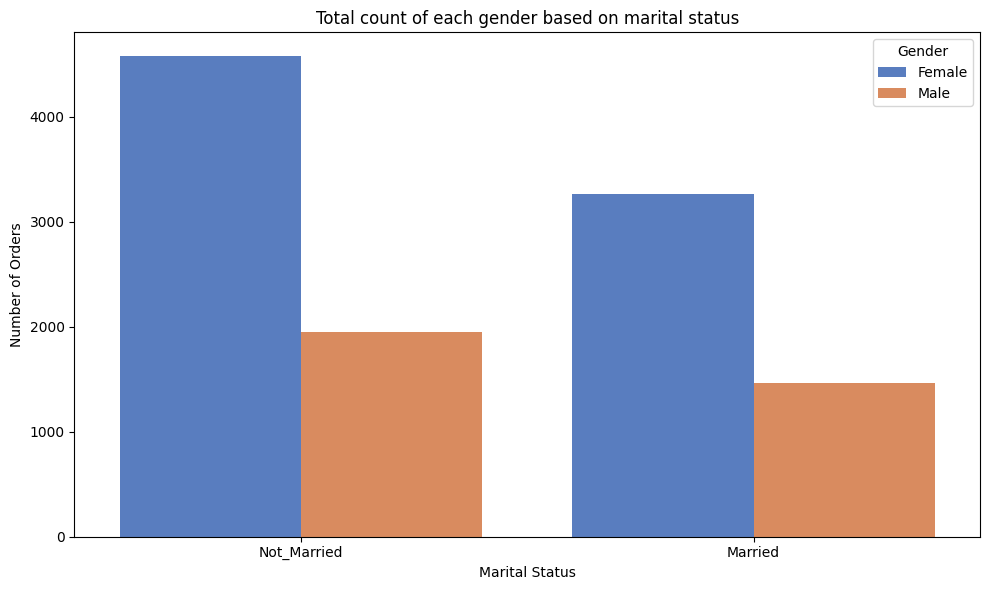

In [ ]:
ms = df.groupby(['Marital_Status','Gender']).size().reset_index(name='counts').sort_values('counts',ascending=False)

# Replace values for better Readibility
ms['Marital_Status']= ms['Marital_Status'].replace({0:'Not_Married',1:'Married'})
ms['Gender']= ms['Gender'].replace({'M':'Male','F':'Female'})
print(ms)

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=ms, x='Marital_Status', y='counts', hue='Gender', palette='muted')

# Update layout for better aesthetics
plt.title('Total count of each gender based on marital status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Orders')
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

# Key insights

The data indicates that Females are more active in placing orders compared to Males, regardless of marital status.

Specifically, 4,573 orders were recorded from Not Married Females, while 1,945 orders were placed by Not Married Males.

Among Married individuals, 3,259 orders were attributed to Married Females, compared to 1,462 orders from Married Males.

This suggests a strong engagement from female customers, particularly those who are not married, presenting an opportunity for targeted marketing strategies.


# Box plot of order amounts by state

This analysis explores the distribution of order amounts across different states.

Using a box plot, we can observe the spread of order values, including medians and outliers, which helps in identifying any states with particularly high or low order amounts.

This visualization can guide regional strategies by highlighting states with significant spending patterns.


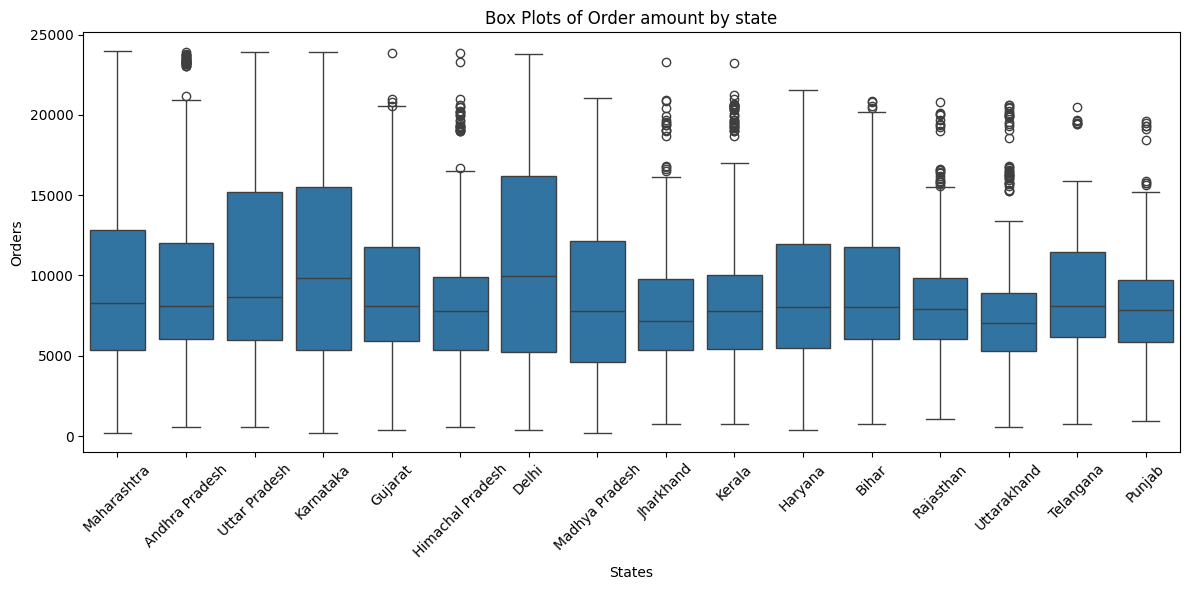

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='State', y='Amount',  data=df)
plt.title('Box Plots of Order amount by state')
plt.xlabel('States')
plt.ylabel('Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Insights

The box plot reveals significant variations in order amounts across different states:

- **Maharashtra and Karnataka** show higher median order amounts, indicating potentially stronger purchasing power or higher-value orders in these states.
- **Uttar Pradesh and Gujarat** also have high maximum order values, though their median values are lower than Maharashtra.
- **States like Jharkhand, Kerala, and Punjab** show relatively lower order amounts overall, with smaller spreads, indicating more consistent but lower-value purchases.
- Several states have **outliers**, suggesting occasional high-value orders, which could indicate specific segments of affluent customers or bulk orders in those regions.


# Orders by age group and product category

This analysis aims to identify **purchasing trends across different age groups and product categories**.
By visualizing the total orders, we can understand which age groups favor certain categories, allowing for more targeted marketing and product recommendations.

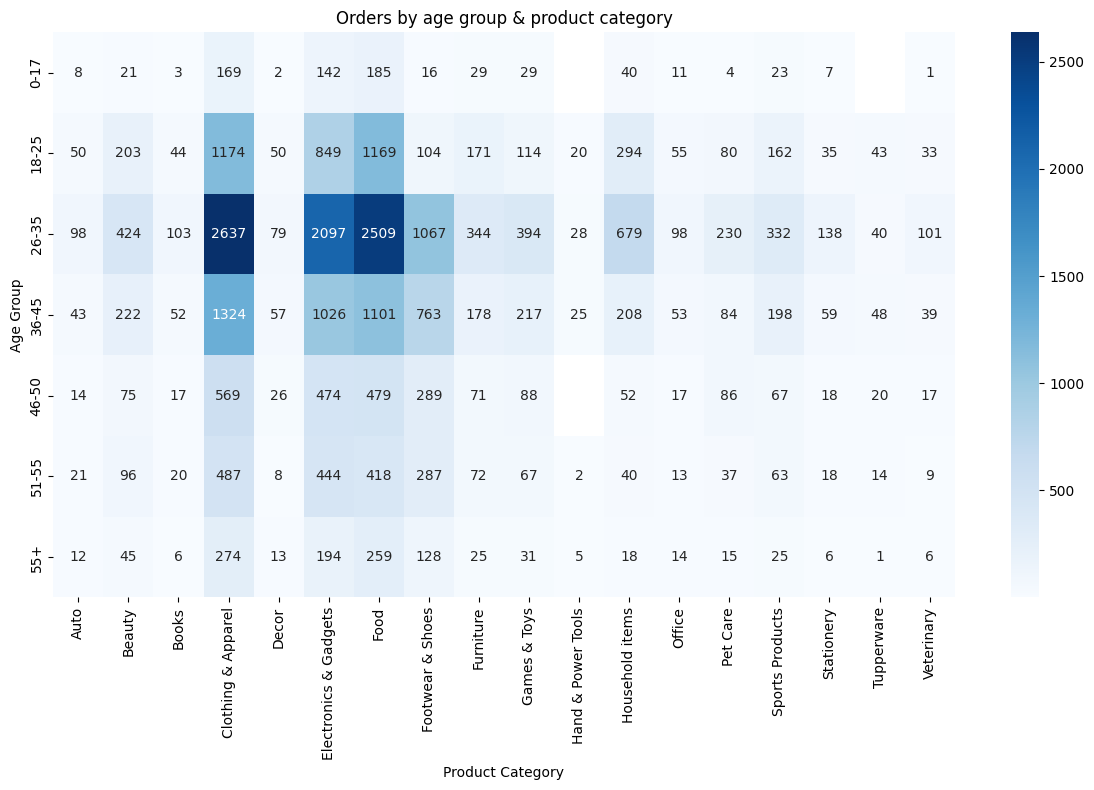

In [ ]:
multi_groups_orders = df.groupby(['Age Group','Product_Category'])['Orders'].sum().unstack()

# Heatmap for multivariate analysis
plt.figure(figsize=(12,8))
sns.heatmap(multi_groups_orders, cmap='Blues', annot=True, fmt='g')
plt.title('Orders by age group & product category')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

# Total orders by zone

In this section, we analyze the total number of orders segmented by different zones in our dataset.

We first group the data by the Zone column and sum the Orders for each zone to obtain the total number of orders per zone.

This aggregated data is then visualized using a grouped bar chart, which allows us to easily compare the total orders across various zones.

<ipython-input-18-7129b5e169f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Zone', y='Total_Orders', palette= 'viridis', data=zone_orders)


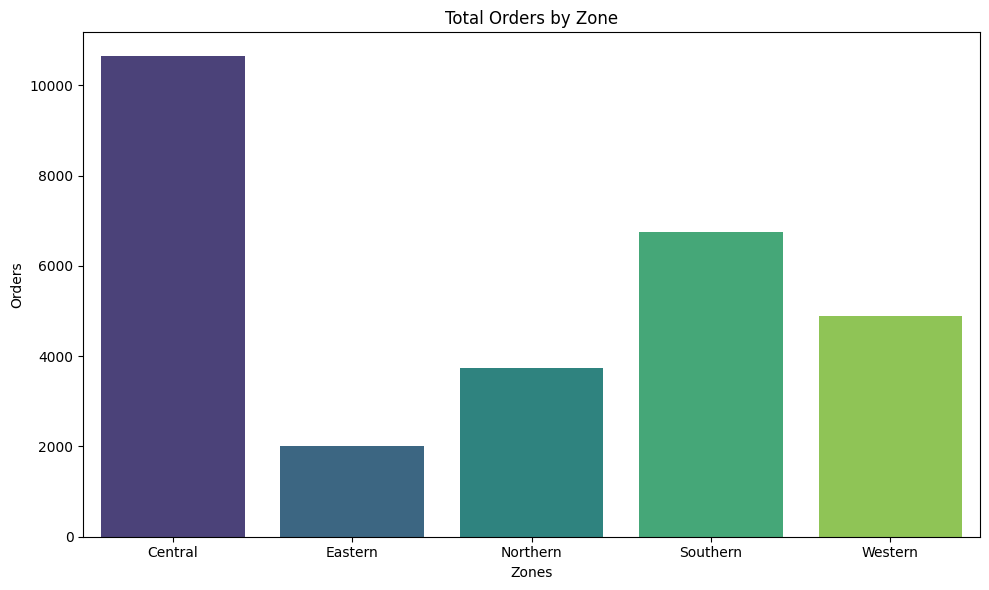

In [ ]:
zone_orders = df.groupby('Zone')['Orders'].sum().reset_index()
zone_orders.columns = ['Zone','Total_Orders']

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Zone', y='Total_Orders', palette= 'viridis', data=zone_orders)

# Update layout for better aesthetics
plt.title('Total Orders by Zone')
plt.xlabel('Zones')
plt.ylabel('Orders')
plt.tight_layout()

# Show the figure
plt.show()

 Key insights

1. **Central Zone Dominance**: The Central zone leads with **10,623** orders, indicating strong engagement and spending during Diwali.

2. **Low Engagement in Eastern Zone**: The Eastern zone's **2,015** orders suggest potential cultural differences or market challenges.

3. **Diverse Regional Practices**: Northern (**3,727**) and Southern (**6,740**) zones show moderate participation, indicating varied Diwali observances.

4. **Logistics Focus**: Concentrated orders in the Central zone highlight the need for efficient supply chain management to meet high demand.

5. **Tailored Marketing**: Localized marketing strategies can enhance appeal and drive sales by aligning with regional customs and preferences.

# Total sales amount by product category

In this analysis, we are aggregating the total sales amounts for each product category to identify trends in sales performance during Diwali.

<ipython-input-23-f4d1a42d4f98>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Product_Category', y='Total_Amount', palette='viridis' )


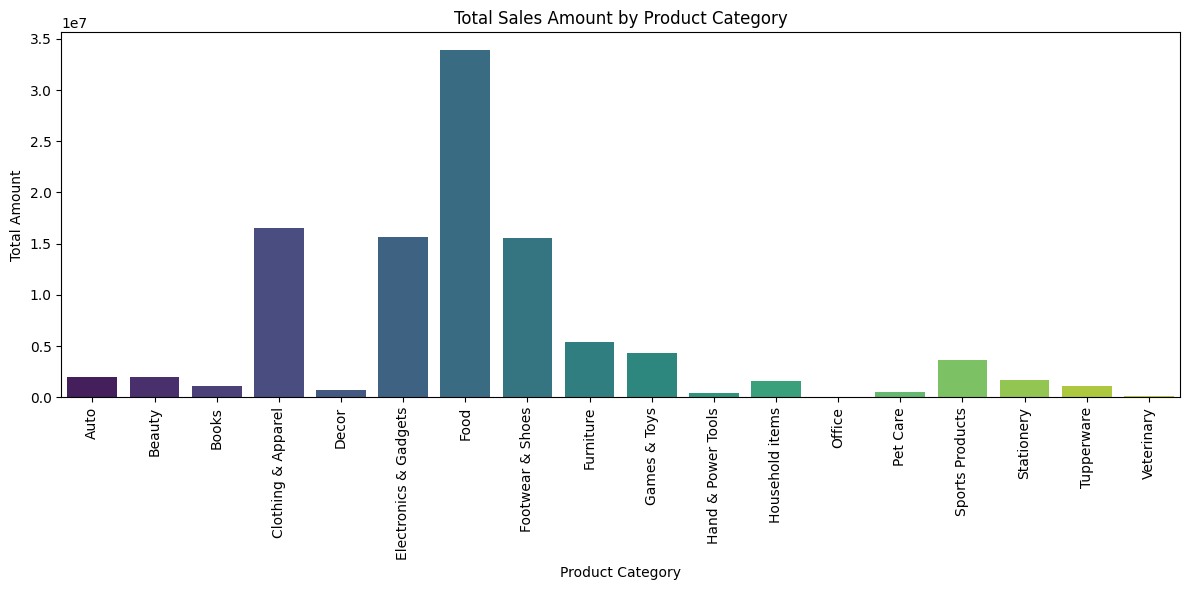

In [ ]:
category_sales = df.groupby('Product_Category')['Amount'].sum().reset_index()
category_sales.columns = ['Product_Category','Total_Amount']

# Bar chart for total sales by product category
plt.figure(figsize=(12,6))
sns.barplot(data=category_sales, x='Product_Category', y='Total_Amount', palette='viridis' )

# Update layout for better aesthetics
plt.title('Total Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the figure
plt.show()


# Key insights from total sales by product category during Diwali

1. **Top Category - Food**: Leads with ₹33,933,883.50, reflecting high demand for festive treats.
2. **Strong Electronics Sales**: Generated ₹15,643,846, showing popularity for tech gifts.
3. **Clothing & Apparel**: Achieved ₹16,495,019 in sales, indicating a trend towards new attire for celebrations.
4. **Footwear Demand**: Totaling ₹15,575,209.45, suggesting shoppers prioritize stylish footwear.
5. **Underperforming Categories**: Office supplies (₹81,936) and veterinary products (₹112,702) show low interest, signaling a need for revised marketing.

# Introduction to clustering for targeted marketing

In data-driven marketing, understanding customer segments is key to delivering targeted promotions and improving customer satisfaction. By identifying clusters within customer data, we can segment customers based on their demographics and purchase behavior. This enables us to tailor marketing strategies for each group, making campaigns more relevant and effective.

### Benefits of clustering in marketing
Clustering can significantly enhance marketing efforts by:
1. **Personalization**: Understanding different groups allows for customized marketing messages that resonate with each segment.
2. **Resource Optimization**: Helps allocate marketing resources effectively by focusing on high-value segments.
3. **Customer Retention**: Identifying clusters helps tailor offers that increase engagement and loyalty among different customer types.

In this project, we use clustering to explore demographic and purchase behavior patterns within Diwali sales data. By analyzing clusters, we aim to uncover key customer segments, identify high-spending groups, and guide targeted marketing initiatives.

---

### Code overview

In the following code, we prepare and analyze our data for clustering to gain insights into customer demographics and spending:
  
1. **Data preprocessing**:
   - We first load and clean the dataset by removing unnecessary columns and handling any missing values.
   - The clustering features are selected to include demographic and categorical attributes, excluding the `Amount` column, as we want to explore the spending behavior within the clusters rather than use it as a clustering feature.  
  
2. **Feature transformation**:
   - Numerical features like `Age` are scaled using `StandardScaler` to ensure uniformity in clustering.
   - Categorical features (`Gender`, `Marital_Status`, `Occupation`, `State`, `Product_Category`) are transformed using `OneHotEncoder` to convert them into binary variables, allowing the clustering algorithm to process these values effectively.
  

3. **KMeans clustering**:
   - We create a pipeline combining preprocessing and KMeans clustering with `n_clusters=4`, aiming to segment the data into four distinct groups. The optimal number of clusters (`n_clusters`) is based on experimentation.
   - The pipeline is fit on the selected features, and each customer is assigned to a demographic cluster.  
  
4. **Cluster analysis**:
   - We analyze the clusters to understand the distribution and behavior of each segment:
      - **Cluster sizes**: Shows the number of customers in each cluster.
      - **Average spending**: Computes the mean amount spent in each cluster, helping identify high- or low-spending groups.
      - **Demographic insights**: Analyzes the mean `Age` and distribution of categorical features within each cluster.  
  
This clustering analysis gives us actionable insights into customer segments, paving the way for targeted marketing strategies tailored to each demographic group.


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To make sure we are working with an unchanged df we reload the df
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path = '/content/drive/MyDrive/Colab Notebooks/Diwali-Sales-Data.csv'
df=pd.read_csv(file_path,encoding='ISO-8859-1')

# Drop unnecessary columns and handle NaN values
df = df.drop(columns=['User_ID','Cust_name','Product_ID','Status','unnamed1','Zone','Orders'], errors='ignore')
df = df.dropna()  # Drop rows with NaN values

# Select the features for clustering (excluding `Amount` as it is our target to cluster on)
clustering_features = ['Gender','Age', 'Marital_Status', 'Occupation', 'State', 'Product_Category']

# Define preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
      transformers=[
          ('num', StandardScaler(),['Age']),   # Scale numerical features (only `Age` here)
          ('cat', OneHotEncoder(drop='first'),['Gender','Marital_Status','Occupation','State','Product_Category']) # Encode categorical features
      ]
)

# Create a pipeline that includes preprocessing and KMeans clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))  # Adjust n_clusters based on optimal selection
])

# Fit the pipeline on the selected feature
pipeline.fit(df[clustering_features])

# Add the cluster labels to the original DataFrame
df['Demographic_Cluster'] = pipeline.predict(df[clustering_features])

# View cluster sizes to understand the distribution of data points across clusters
cluster_size = df['Demographic_Cluster'].value_counts()

# Calculate and display the mean values for `Amount` by cluster to understand spending behavior
amount_summary = df.groupby('Demographic_Cluster')['Amount'].mean()

# Calculate and display the mean values for numeric features by cluster for interpretabilit
numeric_columns = ['Age']
cluster_summary =df.groupby('Demographic_Cluster')[numeric_columns].mean()

# Analyze categorical features within each cluster
categorical_columns = ['Gender', 'Marital_Status', 'Occupation', 'State', 'Product_Category']
categorial_summary ={}

for col in categorical_columns:
  categorial_summary[col]= df.groupby('Demographic_Cluster')[col].value_counts(normalize=True)

# Set display options to avoid truncation
pd.set_option('display.max_rows',None)   # Show all rows
pd.set_option('display.max_columns',None)  # Show all columns
pd.set_option('display.width',None) # Do not truncate based on width

# Display Cluster Sizes
print('Cluster_size:')
print(df['Demographic_Cluster'].value_counts())

# Display mean values for `Amount` by cluste
print('\nAverage amount by Custer:')
print(df.groupby('Demographic_Cluster')['Amount'].mean())

# Display mean values for numeric features by cluster
print('"\nCluster Summary (Mean of Numeric Columns):"')
print(df.groupby('Demographic_Cluster')['Age'].mean())

# Display proportions of each categorical feature within each cluster
print("\nCategorical Summary by Cluster (Proportion of each category):")
for col in ['Gender', 'Marital_Status', 'Occupation', 'State', 'Product_Category']:
  print(f"\n{col}:\n{df.groupby('Demographic_Cluster')[col].value_counts(normalize=True)}")


Mounted at /content/drive
Cluster_size:
Demographic_Cluster
2    4579
3    3069
1    2003
0    1588
Name: count, dtype: int64

Average amount by Custer:
Demographic_Cluster
0     7503.680101
1     6212.605592
2    11285.459474
3     9844.679211
Name: Amount, dtype: float64
"
Cluster Summary (Mean of Numeric Columns):"
Demographic_Cluster
0    29.889169
1    29.629556
2    28.916139
3    51.729554
Name: Age, dtype: float64

Categorical Summary by Cluster (Proportion of each category):

Gender:
Demographic_Cluster  Gender
0                    F         0.707809
                     M         0.292191
1                    F         0.698452
                     M         0.301548
2                    F         0.705831
                     M         0.294169
3                    F         0.676768
                     M         0.323232
Name: proportion, dtype: float64

Marital_Status:
Demographic_Cluster  Marital_Status
0                    0                 0.562343
                    

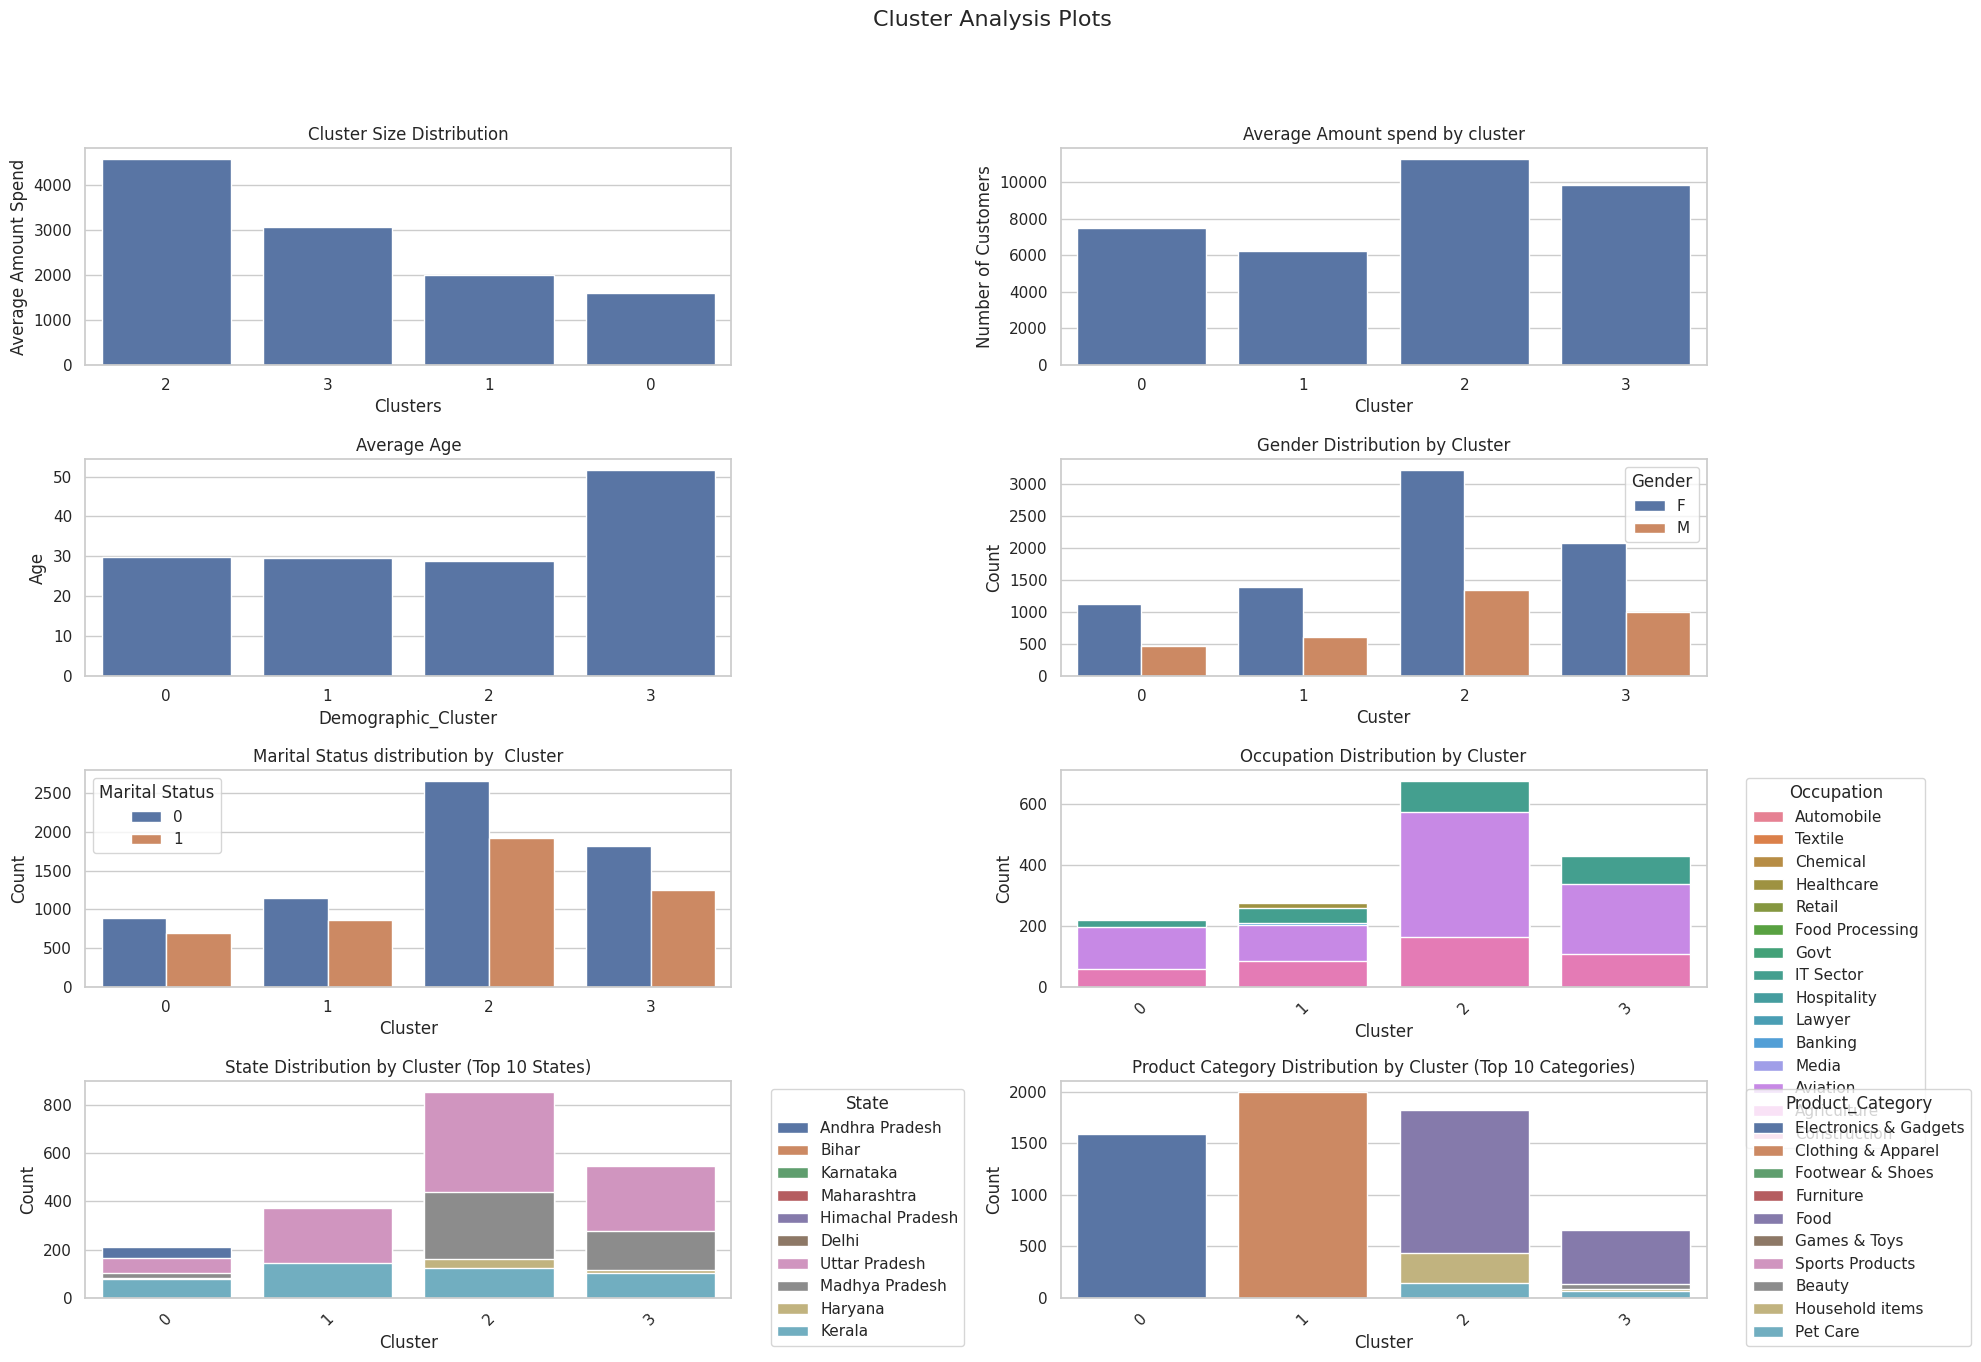

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

# Create a 4x2 grid for all the subplots
fig, axes = plt.subplots(4,2, figsize=(20,20))  # Adjust size as needed
fig.suptitle("Cluster Analysis Plots",fontsize=16)

# 1. Cluster Size Distribution
sns.countplot(x=df['Demographic_Cluster'], order=df['Demographic_Cluster'].value_counts().index, ax=axes[0,0])
axes[0,0].set_title('Cluster Size Distribution')
axes[0,0].set_xlabel('Clusters')
axes[0,0].set_ylabel('Average Amount Spend')

# 2. Average Amount Spent by Cluster
sns.barplot(x=amount_summary.index , y=amount_summary.values, ax=axes[0,1])
axes[0,1].set_title('Average Amount spend by cluster')
axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Number of Customers')

# 3. Age Distribution by Cluster
sns.barplot(x=cluster_summary.index, y=cluster_summary['Age'], ax=axes[1,0])
axes[1,0].set_title('Average Age by Cluster')
axes[1,0].set_title('Cluster')
axes[1,0].set_title('Average Age')

# 4. Gender Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Gender', data=df, ax=axes[1,1])
axes[1,1].set_title('Gender Distribution by Cluster')
axes[1,1].set_xlabel('Custer')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(title='Gender')

# 5. Marital Status Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Marital_Status', data=df,ax=axes[2,0])
axes[2,0].set_title('Marital Status distribution by  Cluster')
axes[2,0].set_xlabel('Cluster')
axes[2,0].set_ylabel('Count')
axes[2,0].legend(title='Marital Status')


# 6. Occupation Distribution by Cluster
sns.countplot(x='Demographic_Cluster', hue='Occupation', data=df, dodge=False, ax=axes[2,1])
axes[2,1].set_title('Occupation Distribution by Cluster')
axes[2,1].set_xlabel('Cluster')
axes[2,1].set_ylabel('Count')
axes[2,1].tick_params(axis='x',rotation=45)
axes[2,1].legend(title='Occupation', bbox_to_anchor=(1.05,1), loc='upper left')

# 7. State Distribution by Cluster (Top 10 States for readability)
top_states=df['State'].value_counts().index[:10]
sns.countplot(x='Demographic_Cluster', hue='State', data=df[df['State'].isin(top_states)], dodge=False, ax=axes[3,0])
axes[3,0].set_title('State Distribution by Cluster (Top 10 States)')
axes[3,0].set_xlabel('Cluster')
axes[3,0].set_ylabel('Count')
axes[3,0].tick_params(axis='x',rotation=45)
axes[3,0].legend(title='State', bbox_to_anchor=(1.05,1), loc=('upper left'))

# 8. Product Category Distribution by Cluster (Top 10 Categories)
top_categories= df['Product_Category'].value_counts().index[:10]
sns.countplot(x='Demographic_Cluster', hue='Product_Category', data=df[df['Product_Category'].isin(top_categories)], dodge=False, ax=axes[3,1])
axes[3,1].set_title('Product Category Distribution by Cluster (Top 10 Categories)')
axes[3,1].set_xlabel('Cluster')
axes[3,1].set_ylabel('Count')
axes[3,1].tick_params(axis='x',rotation=45)
axes[3,1].legend(title='Product_Category', bbox_to_anchor=(1.05,1), loc='upper left')


# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.3, 1, 0.95])   # Leave space for the main title
plt.show()


# Clustering interpretation and insights for targeted marketing

### Cluster 2: High spenders

- **Profile**: Younger, high-income earners around 29 years old.
- **Spending**: 11,285 on average, mainly on food, footwear, and household items.
- **Opportunity**: Target them with premium and exclusive offers.

### Cluster 3: Mature buyers

- **Profile**: Older customers, averaging 51 years.
- **Spending**: 9,844 on a variety of practical items like food, electronics, and clothing.
- **Opportunity**: Appeal to them with campaigns focused on quality and reliability.

### Cluster 0: Tech enthusiasts

- **Profile**: Young adults around 30, with a focus on electronics.
- **Spending**: 7,503 on average, entirely on gadgets.
- **Opportunity**: Highlight tech deals and exclusive product launches.

### Cluster 1: Budget fashion shoppers

- **Profile**: Primarily young females focused on apparel.
- **Spending**: 6,212 on average, solely on clothing.
- **Opportunity**: Engage them with affordable, trendy fashion promotions.

---

Each cluster has distinct preferences, allowing for targeted marketing:
- Premium offers for high spenders,
- Quality-focused ads for mature buyers,
- Tech promotions for gadget enthusiasts, and
- Budget-friendly fashion deals for apparel shoppers.

In summary, the analysis of Diwali sales data reveals four distinct customer clusters with specific spending behaviors and product preferences. By tailoring marketing strategies to each cluster, the marketplace can maximize engagement and improve sales. High spenders can be drawn in with premium offerings, mature buyers with quality-focused ads, tech enthusiasts with gadget promotions, and budget-conscious fashion shoppers with affordable deals. This targeted approach allows for efficient allocation of marketing resources, ensuring each customer segment receives relevant, impactful promotions, enhancing overall customer satisfaction and loyalty.